In [113]:
# Import required libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn.metrics as metrics

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

In [114]:

travel_train = pd.read_csv("Traveldata_train.csv")

survey_train = pd.read_csv("Surveydata_train.csv")


travel_test = pd.read_csv("Traveldata_test.csv")

survey_test = pd.read_csv("Surveydata_test.csv")


### **Travel Train Data**

In [115]:
travel_train.shape

(94379, 9)

In [116]:
travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [117]:
travel_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [118]:
travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [119]:
travel_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [120]:
travel_train.describe(include=['object']).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342


In [121]:
travel_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [122]:
travel_train.sort_values('Age', ascending=True).head(10)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
15301,98815302,Male,Loyal Customer,7.0,Business Travel,Eco,3458,27.0,7.0
75254,98875255,Male,Loyal Customer,7.0,Personal Travel,Eco,2369,0.0,0.0
70806,98870807,Female,Loyal Customer,7.0,Personal Travel,Eco,2052,14.0,5.0
50662,98850663,Female,Loyal Customer,7.0,Business Travel,Business,2368,17.0,2.0
33514,98833515,Female,Loyal Customer,7.0,Personal Travel,Eco,1978,0.0,0.0
33517,98833518,Male,Loyal Customer,7.0,Personal Travel,Eco,1907,16.0,3.0
64078,98864079,Female,Loyal Customer,7.0,Personal Travel,Eco,2068,0.0,0.0
33257,98833258,Male,Loyal Customer,7.0,Personal Travel,Eco,1830,54.0,47.0
50551,98850552,Male,Loyal Customer,7.0,Personal Travel,Eco,2865,18.0,16.0
33957,98833958,Female,Loyal Customer,7.0,Personal Travel,Eco,2258,0.0,0.0


In [123]:
travel_train.sort_values('Age', ascending=False).head(10)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
74072,98874073,Female,Loyal Customer,85.0,Business Travel,Business,3548,0.0,0.0
67350,98867351,Female,Loyal Customer,85.0,Business Travel,Business,2052,17.0,11.0
69916,98869917,Male,Disloyal Customer,85.0,Business Travel,Business,3072,0.0,7.0
77916,98877917,Female,Disloyal Customer,85.0,Business Travel,Business,1965,0.0,0.0
70074,98870075,Female,Disloyal Customer,85.0,Business Travel,Business,2837,57.0,51.0
65594,98865595,Female,Loyal Customer,85.0,Business Travel,Business,2007,0.0,0.0
28510,98828511,Female,Loyal Customer,85.0,Business Travel,Business,5022,0.0,0.0
59520,98859521,Female,Disloyal Customer,85.0,Business Travel,Business,2057,0.0,0.0
55747,98855748,Female,NaN,85.0,Business Travel,Business,2565,0.0,0.0
47311,98847312,Male,Loyal Customer,85.0,NaN,Business,3765,14.0,7.0


### **Survey Train Data**

In [124]:
survey_train.shape

(94379, 17)

In [125]:
survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [126]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [127]:
survey_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [128]:
survey_train.describe(include=['object']).T

,count,unique,top,freq
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835
Onboard_Entertainment,94361,6,Good,30446
Online_Support,94288,6,Good,30016
Ease_of_Online_Booking,94306,6,Good,28909
Onboard_Service,86778,6,Good,27265


In [129]:
survey_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

### **Travel Test Data**

In [130]:
travel_test.shape

(35602, 9)

In [131]:
travel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [132]:
travel_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


In [133]:
travel_test.describe(include=['object']).T

,count,unique,top,freq
Gender,35572,2,Female,18069
Customer_Type,32219,2,Loyal Customer,26349
Type_Travel,32154,2,Business Travel,22313
Travel_Class,35602,2,Eco,18473


In [134]:
travel_test.isnull().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

### **Survey Test Data**

In [135]:
survey_test.shape

(35602, 16)

In [136]:
survey_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [137]:
survey_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0


In [138]:
survey_test.describe(include=['object']).T

,count,unique,top,freq
Seat_Comfort,35580,6,Acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_Time_Convenient,32277,6,Good,7361
Catering,32245,6,Acceptable,7133
Platform_Location,35590,5,Manageable,9364
Onboard_Wifi_Service,35590,6,Good,8743
Onboard_Entertainment,35594,6,Good,11436
Online_Support,35576,5,Good,11487
Ease_of_Online_Booking,35584,6,Good,11025
Onboard_Service,32730,5,Good,10222


In [139]:
survey_test.isnull().sum()

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

### **Merging the datasets travel and survey for train and test**

In [140]:
df_train = pd.merge(travel_train, survey_train, on= 'ID')
df_test = pd.merge(travel_test, survey_test, on= 'ID')

In [141]:
print(df_train.shape)
print(df_test.shape)

(94379, 25)
(35602, 24)


In [142]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [143]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [144]:
df_train.describe(include=['object']).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835


## **1. Univariate Analysis - Numerical Data**

In [145]:
def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

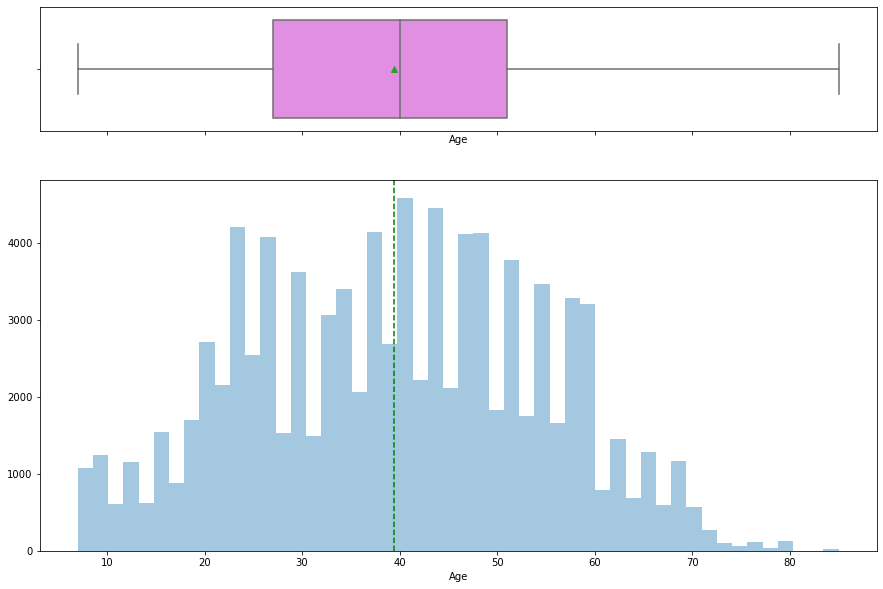

In [146]:
histogram_boxplot(df_train['Age'])

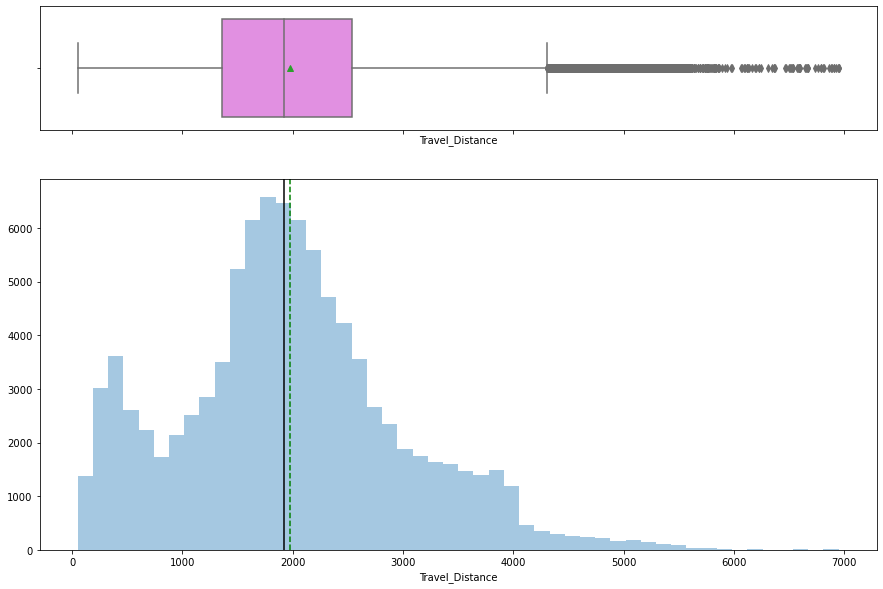

In [147]:
histogram_boxplot(df_train['Travel_Distance'])

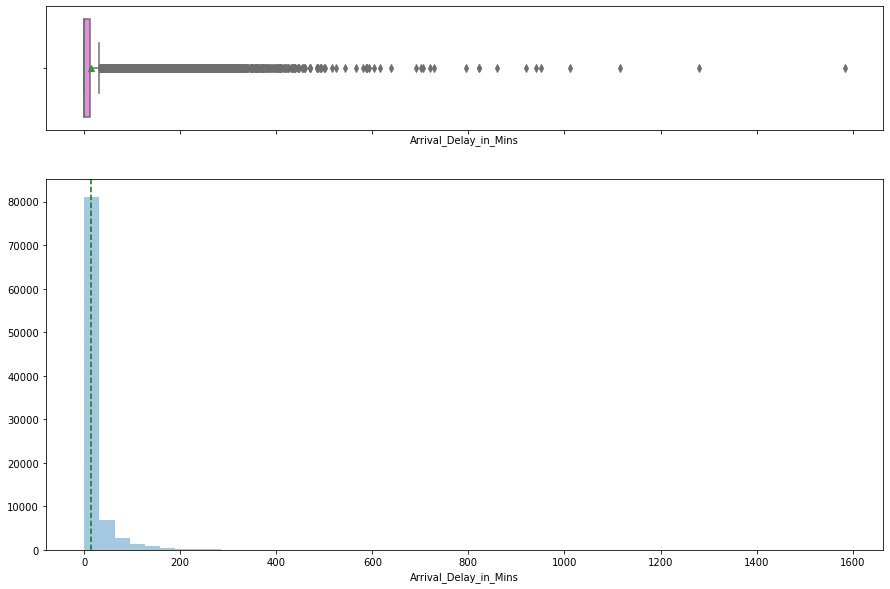

In [148]:
histogram_boxplot(df_train['Arrival_Delay_in_Mins'])

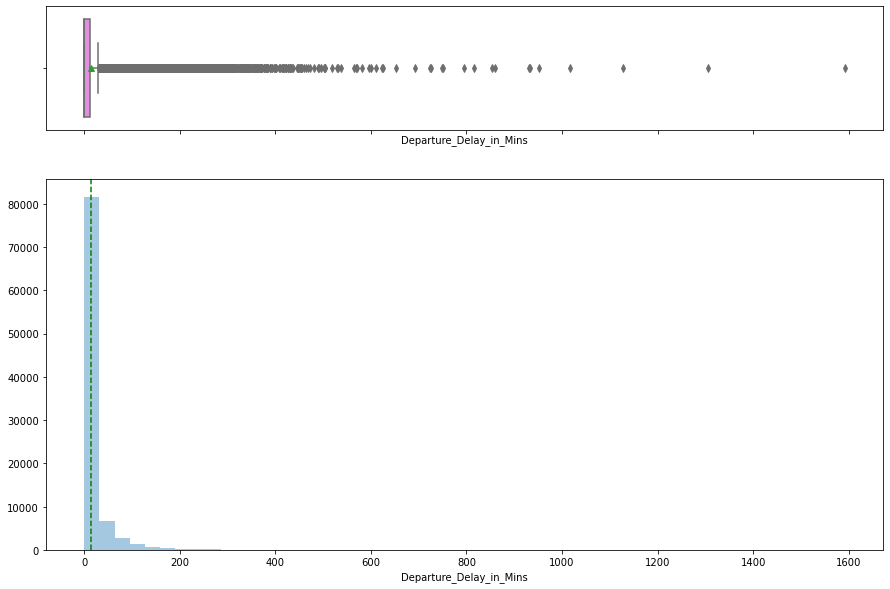

In [149]:
histogram_boxplot(df_train['Departure_Delay_in_Mins'])

## **2. Univariate analysis - Categorical Data**

In [150]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(feature, palette = 'Paired', order = feature.value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

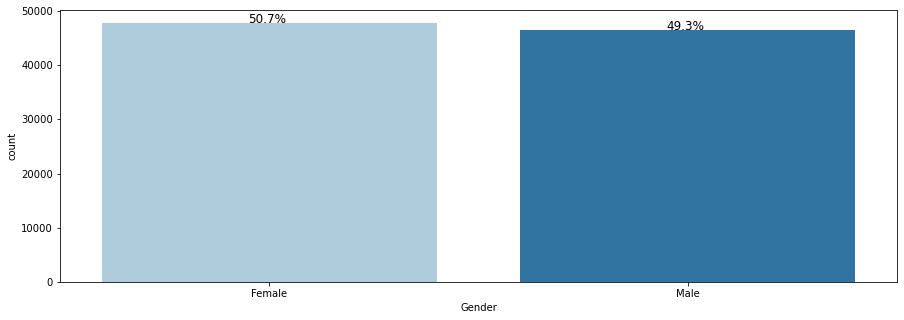

In [151]:
perc_on_bar(df_train['Gender'])

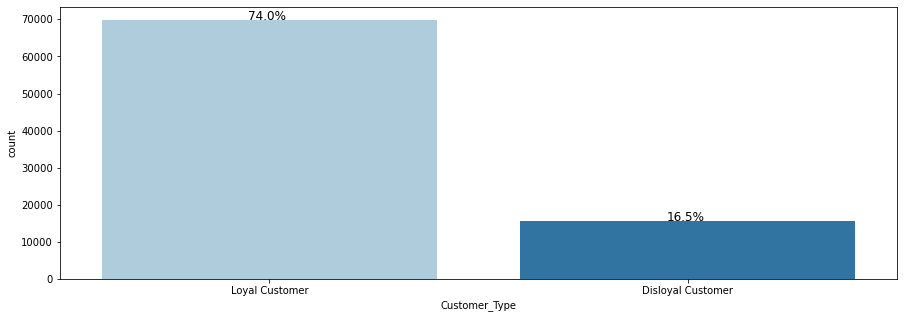

In [152]:
perc_on_bar(df_train['Customer_Type'])

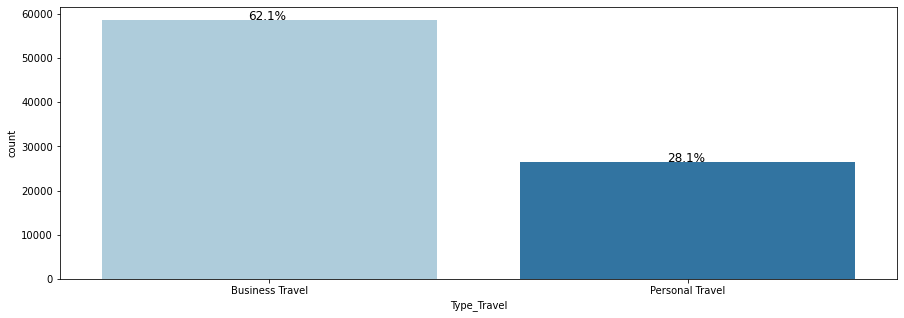

In [153]:
perc_on_bar(df_train['Type_Travel'])

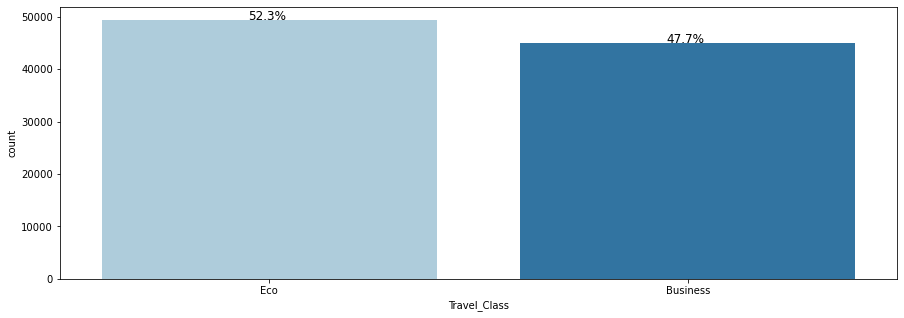

In [154]:
perc_on_bar(df_train['Travel_Class'])

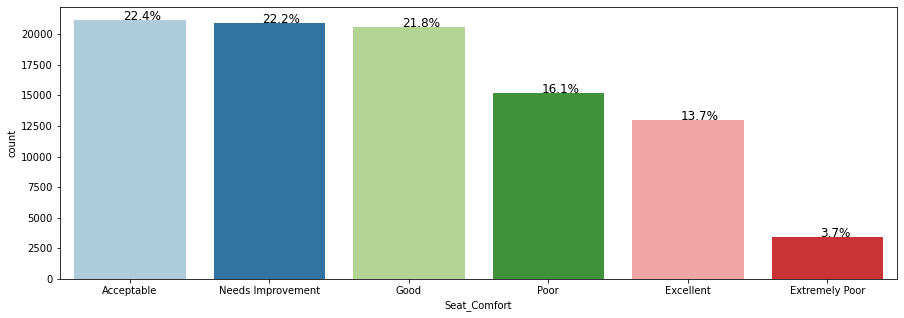

In [155]:
perc_on_bar(df_train['Seat_Comfort'])

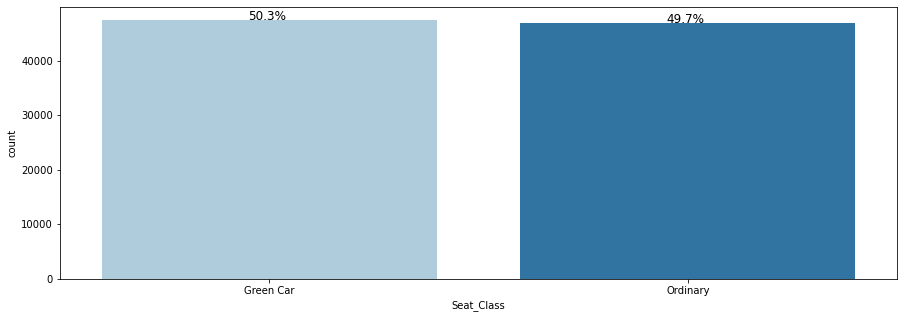

In [156]:
perc_on_bar(df_train['Seat_Class'])

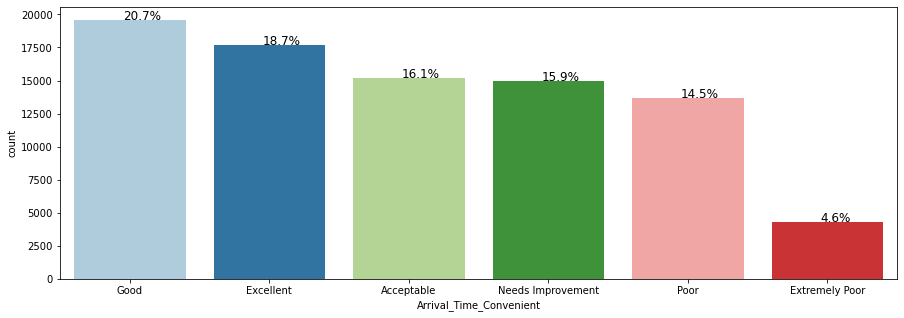

In [157]:
perc_on_bar(df_train['Arrival_Time_Convenient'])

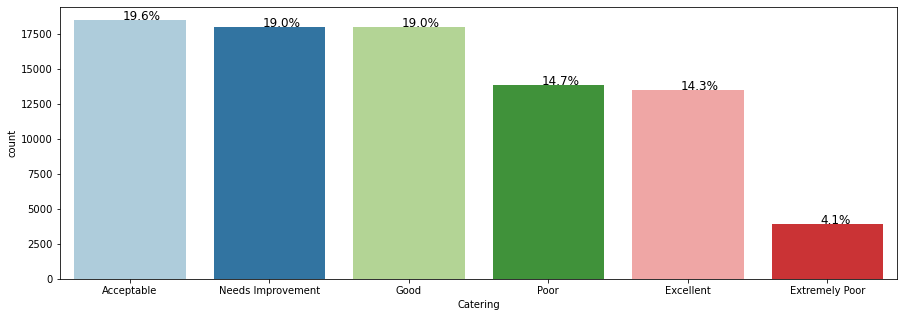

In [158]:
perc_on_bar(df_train['Catering'])

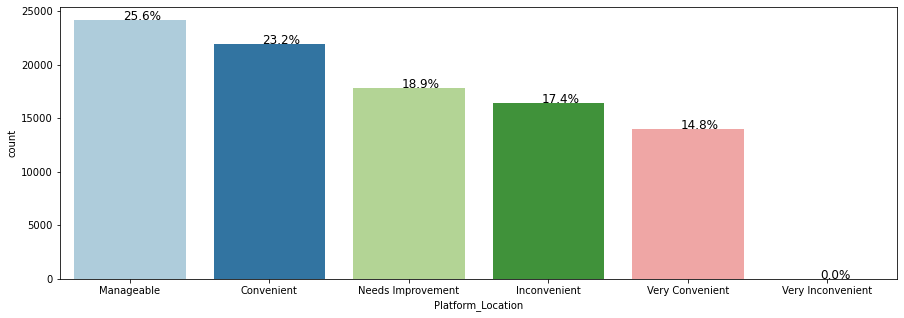

In [159]:
perc_on_bar(df_train['Platform_Location'])

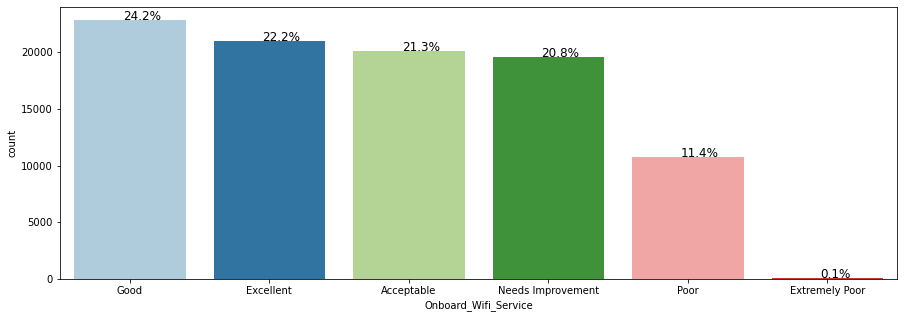

In [160]:
perc_on_bar(df_train['Onboard_Wifi_Service'])

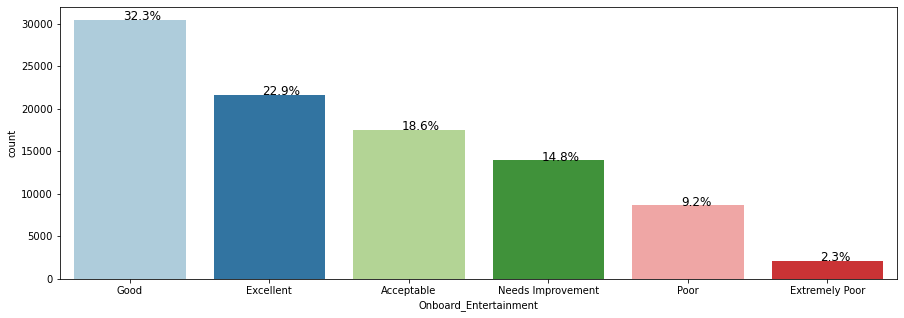

In [161]:
perc_on_bar(df_train['Onboard_Entertainment'])

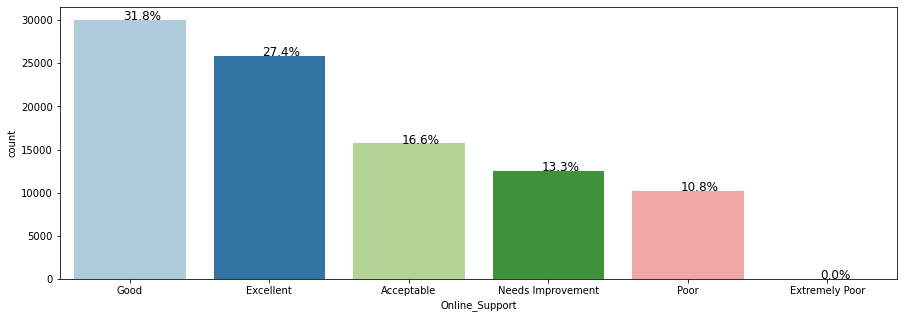

In [162]:
perc_on_bar(df_train['Online_Support'])

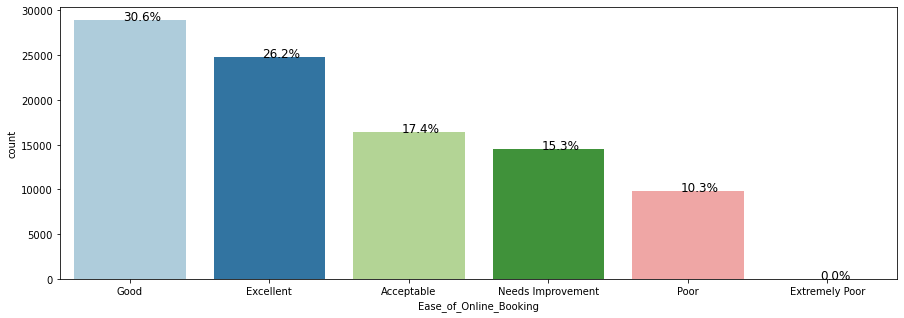

In [163]:
perc_on_bar(df_train['Ease_of_Online_Booking'])

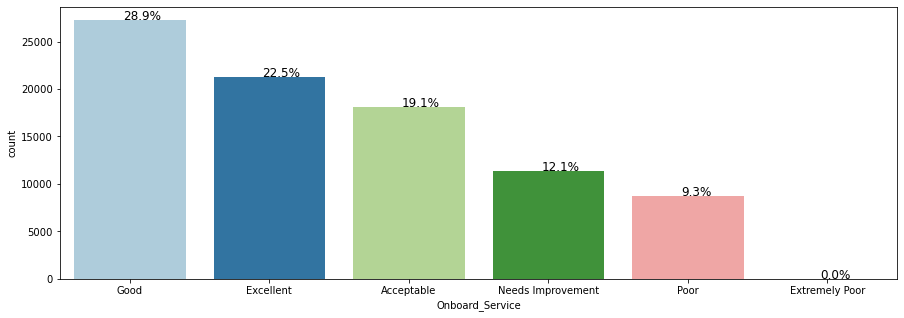

In [164]:
perc_on_bar(df_train['Onboard_Service'])

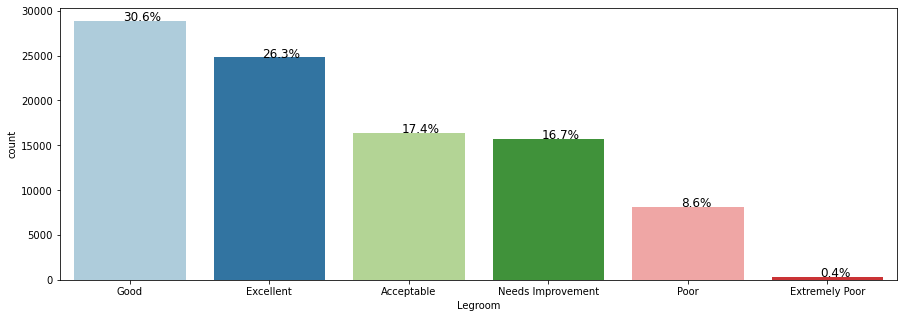

In [165]:
perc_on_bar(df_train['Legroom'])

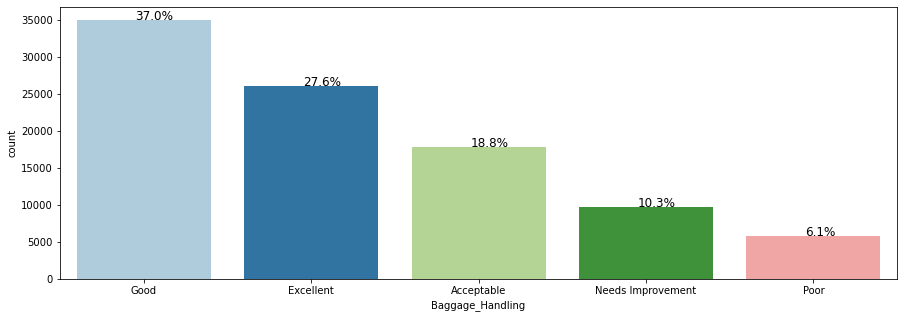

In [166]:
perc_on_bar(df_train['Baggage_Handling'])

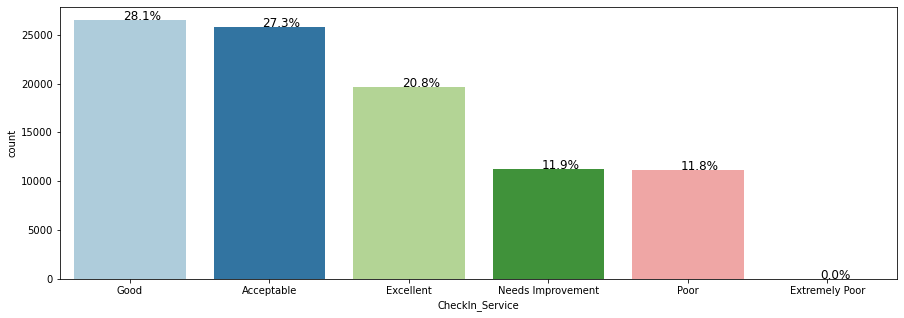

In [167]:
perc_on_bar(df_train['CheckIn_Service'])

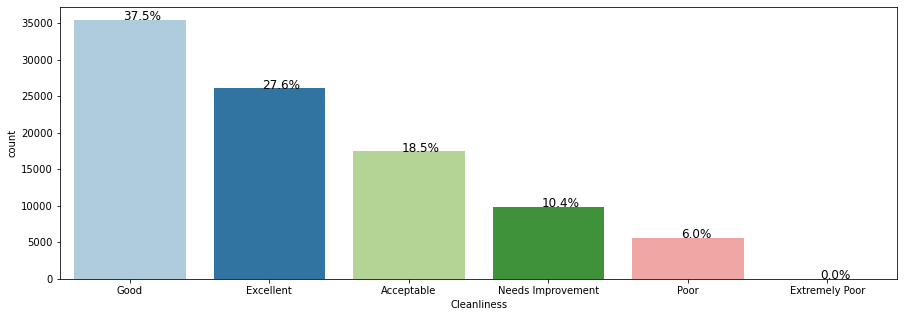

In [168]:
perc_on_bar(df_train['Cleanliness'])

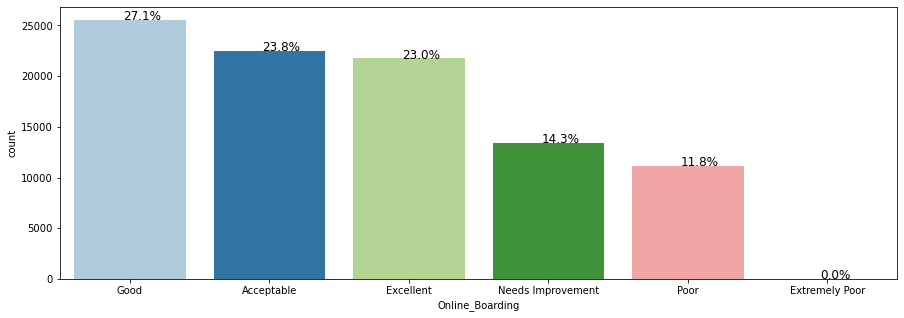

In [169]:
perc_on_bar(df_train['Online_Boarding'])

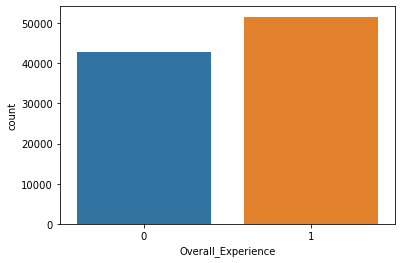

In [170]:
sns.countplot('Overall_Experience',data = df_train)
plt.show()

In [171]:
df_train.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

### **Imputing NaN Values on Categorical Features**

In [172]:
df_train[df_train['Gender'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
572,98800573,NaN,NaN,57.0,Business Travel,Business,585,0.0,0.0,1,Poor,Green Car,NaN,Poor,Inconvenient,Acceptable,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Good
2428,98802429,NaN,NaN,26.0,Business Travel,Business,2229,NaN,NaN,0,Acceptable,Ordinary,Acceptable,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Excellent,Excellent,Excellent,Good,Good,Needs Improvement
3779,98803780,NaN,NaN,21.0,Business Travel,Eco,2311,NaN,NaN,0,Poor,Green Car,Poor,Poor,Convenient,Needs Improvement,Poor,Needs Improvement,Needs Improvement,Good,Needs Improvement,Good,Good,Excellent,Needs Improvement
3929,98803930,NaN,NaN,31.0,Personal Travel,Eco,2958,NaN,NaN,0,Needs Improvement,Ordinary,Acceptable,Needs Improvement,Manageable,Poor,Needs Improvement,Poor,Poor,Needs Improvement,Needs Improvement,Good,Good,Acceptable,Poor
5588,98805589,NaN,NaN,44.0,Business Travel,Eco,1002,0.0,0.0,1,Excellent,Green Car,Acceptable,NaN,Manageable,Poor,Good,Good,Excellent,Excellent,Excellent,Excellent,Needs Improvement,Excellent,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88755,98888756,NaN,NaN,29.0,Business Travel,Business,3362,19.0,11.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Good,Good,Good,Excellent,Excellent,Good,Good,Good,Good
88874,98888875,NaN,NaN,44.0,Business Travel,Business,1158,7.0,0.0,1,Poor,Green Car,Poor,Poor,Inconvenient,Needs Improvement,Good,Good,Good,Good,Excellent,Good,Excellent,Good,Acceptable
88923,98888924,NaN,NaN,53.0,Personal Travel,Eco,1255,8.0,1.0,0,Good,Ordinary,Good,Good,Very Convenient,Acceptable,Good,Acceptable,Acceptable,Acceptable,Acceptable,Good,Good,Good,Acceptable
91915,98891916,NaN,NaN,9.0,Business Travel,Business,2271,NaN,NaN,1,Acceptable,Green Car,Acceptable,Needs Improvement,Manageable,Good,Good,Good,Good,Good,Good,Excellent,Good,Excellent,Good


In [173]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0]) 
df_train.isnull().sum()

ID                            0
Gender                        0
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [174]:
df_train['Customer_Type'] = df_train['Customer_Type'].fillna(df_train['Customer_Type'].mode()[0]) 
df_train[df_train['Customer_Type'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [175]:
df_train['Type_Travel'] = df_train['Type_Travel'].fillna(df_train['Type_Travel'].mode()[0]) 
df_train[df_train['Type_Travel'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [176]:
df_train['Travel_Class'] = df_train['Travel_Class'].fillna(df_train['Travel_Class'].mode()[0]) 
df_train[df_train['Travel_Class'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [177]:
df_train['Seat_Comfort'] = df_train['Seat_Comfort'].fillna(df_train['Seat_Comfort'].mode()[0]) 
df_train[df_train['Seat_Comfort'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [178]:
df_train['Catering'] = df_train['Catering'].fillna(df_train['Catering'].mode()[0]) 
df_train[df_train['Catering'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [179]:
df_train['Platform_Location'] = df_train['Platform_Location'].fillna(df_train['Platform_Location'].mode()[0]) 
df_train[df_train['Platform_Location'].isnull()]


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [180]:
df_train['Onboard_Wifi_Service'] = df_train['Onboard_Wifi_Service'].fillna(df_train['Onboard_Wifi_Service'].mode()[0]) 
df_train[df_train['Onboard_Wifi_Service'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [181]:
df_train['Onboard_Entertainment'] = df_train['Onboard_Entertainment'].fillna(df_train['Onboard_Entertainment'].mode()[0]) 
df_train[df_train['Onboard_Entertainment'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [182]:
df_train['Online_Support'] = df_train['Online_Support'].fillna(df_train['Online_Support'].mode()[0]) 
df_train[df_train['Online_Support'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [183]:
df_train['Ease_of_Online_Booking'] = df_train['Ease_of_Online_Booking'].fillna(df_train['Ease_of_Online_Booking'].mode()[0]) 
df_train[df_train['Ease_of_Online_Booking'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [184]:
df_train['Onboard_Service'] = df_train['Onboard_Service'].fillna(df_train['Onboard_Service'].mode()[0]) 
df_train[df_train['Onboard_Service'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [185]:
df_train['Legroom'] = df_train['Legroom'].fillna(df_train['Legroom'].mode()[0]) 
df_train[df_train['Legroom'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [186]:
df_train['Baggage_Handling'] = df_train['Baggage_Handling'].fillna(df_train['Baggage_Handling'].mode()[0]) 
df_train[df_train['Baggage_Handling'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [187]:
df_train['CheckIn_Service'] = df_train['CheckIn_Service'].fillna(df_train['CheckIn_Service'].mode()[0]) 
df_train[df_train['CheckIn_Service'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [188]:
df_train['Cleanliness'] = df_train['Cleanliness'].fillna(df_train['Cleanliness'].mode()[0]) 
df_train[df_train['Cleanliness'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [189]:
df_train['Online_Boarding'] = df_train['Online_Boarding'].fillna(df_train['Online_Boarding'].mode()[0]) 
df_train[df_train['Online_Boarding'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [190]:
df_train['Arrival_Time_Convenient'] = df_train['Arrival_Time_Convenient'].fillna(df_train['Arrival_Time_Convenient'].mode()[0]) 
df_train[df_train['Arrival_Time_Convenient'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [191]:
df_train.isnull().sum()

ID                           0
Gender                       0
Customer_Type                0
Age                         33
Type_Travel                  0
Travel_Class                 0
Travel_Distance              0
Departure_Delay_in_Mins     57
Arrival_Delay_in_Mins      357
Overall_Experience           0
Seat_Comfort                 0
Seat_Class                   0
Arrival_Time_Convenient      0
Catering                     0
Platform_Location            0
Onboard_Wifi_Service         0
Onboard_Entertainment        0
Online_Support               0
Ease_of_Online_Booking       0
Onboard_Service              0
Legroom                      0
Baggage_Handling             0
CheckIn_Service              0
Cleanliness                  0
Online_Boarding              0
dtype: int64

In [192]:
df_train.describe(include=['object']).T

,count,unique,top,freq
Gender,94379,2,Female,47892
Customer_Type,94379,2,Loyal Customer,78774
Type_Travel,94379,2,Business Travel,67843
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94379,6,Acceptable,21219
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,94379,6,Good,28504
Catering,94379,6,Acceptable,27209
Platform_Location,94379,6,Manageable,24203
Onboard_Wifi_Service,94379,6,Good,22865


In [193]:
#Repeating all imputing for test dataset

df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].mode()[0]) 
df_test['Customer_Type'] = df_test['Customer_Type'].fillna(df_test['Customer_Type'].mode()[0]) 
df_test['Type_Travel'] = df_test['Type_Travel'].fillna(df_test['Type_Travel'].mode()[0]) 
df_test['Travel_Class'] = df_test['Travel_Class'].fillna(df_test['Travel_Class'].mode()[0]) 
df_test['Seat_Comfort'] = df_test['Seat_Comfort'].fillna(df_test['Seat_Comfort'].mode()[0]) 
df_test['Catering'] = df_test['Catering'].fillna(df_test['Catering'].mode()[0]) 
df_test['Platform_Location'] = df_test['Platform_Location'].fillna(df_test['Platform_Location'].mode()[0]) 
df_test['Onboard_Wifi_Service'] = df_test['Onboard_Wifi_Service'].fillna(df_test['Onboard_Wifi_Service'].mode()[0]) 
df_test['Onboard_Entertainment'] = df_test['Onboard_Entertainment'].fillna(df_test['Onboard_Entertainment'].mode()[0]) 
df_test['Online_Support'] = df_test['Online_Support'].fillna(df_test['Online_Support'].mode()[0]) 
df_test['Ease_of_Online_Booking'] = df_test['Ease_of_Online_Booking'].fillna(df_test['Ease_of_Online_Booking'].mode()[0]) 
df_test['Onboard_Service'] = df_test['Onboard_Service'].fillna(df_test['Onboard_Service'].mode()[0]) 
df_test['Legroom'] = df_test['Legroom'].fillna(df_test['Legroom'].mode()[0]) 
df_test['Baggage_Handling'] = df_test['Baggage_Handling'].fillna(df_test['Baggage_Handling'].mode()[0]) 
df_test['CheckIn_Service'] = df_test['CheckIn_Service'].fillna(df_test['CheckIn_Service'].mode()[0]) 
df_test['Cleanliness'] = df_test['Cleanliness'].fillna(df_test['Cleanliness'].mode()[0]) 
df_test['Online_Boarding'] = df_test['Online_Boarding'].fillna(df_test['Online_Boarding'].mode()[0]) 
df_test['Arrival_Time_Convenient'] = df_test['Arrival_Time_Convenient'].fillna(df_test['Arrival_Time_Convenient'].mode()[0]) 


### **Imputing NaN Values on Numerical Features**

In [194]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median()) 
df_train[df_train['Age'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [195]:
df_train['Departure_Delay_in_Mins'] = df_train['Departure_Delay_in_Mins'].fillna(df_train['Departure_Delay_in_Mins'].median()) 
df_train[df_train['Departure_Delay_in_Mins'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [196]:
df_train['Arrival_Delay_in_Mins'] = df_train['Arrival_Delay_in_Mins'].fillna(df_train['Arrival_Delay_in_Mins'].median()) 
df_train[df_train['Arrival_Delay_in_Mins'].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [197]:
#Repeating all imputing for test dataset

df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median()) 
df_test['Departure_Delay_in_Mins'] = df_test['Departure_Delay_in_Mins'].fillna(df_test['Departure_Delay_in_Mins'].median()) 
df_test['Arrival_Delay_in_Mins'] = df_test['Arrival_Delay_in_Mins'].fillna(df_test['Arrival_Delay_in_Mins'].median()) 



### **Encoding Categorical Ordinal Variables**

In [198]:
Platform_Location_Ord = {"Very Inconvenient":1, "Inconvenient":2, "Needs Improvement":3, "Manageable":4, "Convenient":5, "Very Convenient":6}
df_train['Platform_Location_Ord'] = df_train['Platform_Location'].map(Platform_Location_Ord)

In [199]:
print(df_train.groupby('Platform_Location_Ord')['ID'].count().sort_values(ascending=False))
print(df_train.groupby('Platform_Location')['ID'].count().sort_values(ascending=False))

Platform_Location_Ord
4    24203
5    21912
3    17832
2    16449
6    13981
1        2
Name: ID, dtype: int64
Platform_Location
Manageable           24203
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981
Very Inconvenient        2
Name: ID, dtype: int64


In [200]:
Ordinal = {"Extremely Poor":1, "Poor":2, "Needs Improvement":3, "Acceptable":4, "Good":5, "Excellent":6}

df_train['Seat_Comfort_Ord'] = df_train['Seat_Comfort'].map(Ordinal)
df_train['Arrival_Time_Convenient_Ord'] = df_train['Arrival_Time_Convenient'].map(Ordinal)
df_train['Catering_Ord'] = df_train['Catering'].map(Ordinal)
df_train['Onboard_Wifi_Service_Ord'] = df_train['Onboard_Wifi_Service'].map(Ordinal)
df_train['Onboard_Entertainment_Ord'] = df_train['Onboard_Entertainment'].map(Ordinal)
df_train['Online_Support_Ord'] = df_train['Online_Support'].map(Ordinal)
df_train['Ease_of_Online_Booking_Ord'] = df_train['Ease_of_Online_Booking'].map(Ordinal)
df_train['Onboard_Service_Ord'] = df_train['Onboard_Service'].map(Ordinal)
df_train['Legroom_Ord'] = df_train['Legroom'].map(Ordinal)
df_train['Baggage_Handling_Ord'] = df_train['Baggage_Handling'].map(Ordinal)
df_train['CheckIn_Service_Ord'] = df_train['CheckIn_Service'].map(Ordinal)
df_train['Cleanliness_Ord'] = df_train['Cleanliness'].map(Ordinal)
df_train['Online_Boarding_Ord'] = df_train['Online_Boarding'].map(Ordinal)



In [201]:
print(df_train.groupby('Seat_Comfort_Ord')['ID'].count().sort_values(ascending=False))
print(df_train.groupby('Seat_Comfort')['ID'].count().sort_values(ascending=False))

Seat_Comfort_Ord
4    21219
3    20946
5    20595
2    15185
6    12971
1     3463
Name: ID, dtype: int64
Seat_Comfort
Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: ID, dtype: int64


In [202]:
print(df_train.groupby('Catering_Ord')['ID'].count().sort_values(ascending=False))
print(df_train.groupby('Catering')['ID'].count().sort_values(ascending=False))

Catering_Ord
4    27209
3    17978
5    17969
2    13858
6    13455
1     3910
Name: ID, dtype: int64
Catering
Acceptable           27209
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: ID, dtype: int64


In [203]:
#Repeating all encoding for test dataset

df_test['Platform_Location_Ord'] = df_test['Platform_Location'].map(Platform_Location_Ord)

df_test['Seat_Comfort_Ord'] = df_test['Seat_Comfort'].map(Ordinal)
df_test['Arrival_Time_Convenient_Ord'] = df_test['Arrival_Time_Convenient'].map(Ordinal)
df_test['Catering_Ord'] = df_test['Catering'].map(Ordinal)
df_test['Onboard_Wifi_Service_Ord'] = df_test['Onboard_Wifi_Service'].map(Ordinal)
df_test['Onboard_Entertainment_Ord'] = df_test['Onboard_Entertainment'].map(Ordinal)
df_test['Online_Support_Ord'] = df_test['Online_Support'].map(Ordinal)
df_test['Ease_of_Online_Booking_Ord'] = df_test['Ease_of_Online_Booking'].map(Ordinal)
df_test['Onboard_Service_Ord'] = df_test['Onboard_Service'].map(Ordinal)
df_test['Legroom_Ord'] = df_test['Legroom'].map(Ordinal)
df_test['Baggage_Handling_Ord'] = df_test['Baggage_Handling'].map(Ordinal)
df_test['CheckIn_Service_Ord'] = df_test['CheckIn_Service'].map(Ordinal)
df_test['Cleanliness_Ord'] = df_test['Cleanliness'].map(Ordinal)
df_test['Online_Boarding_Ord'] = df_test['Online_Boarding'].map(Ordinal)


### **Binning Age Column**

In [204]:
df_train.groupby('Age')['ID'].count().sort_index(ascending=False)

Age
85.0     18
80.0     88
79.0     39
78.0     30
77.0     82
       ... 
11.0    611
10.0    608
9.0     640
8.0     572
7.0     505
Name: ID, Length: 75, dtype: int64

In [205]:
bins = [0, 13, 25, 40, 65, np.inf]

names = ['<13', '13-25', '25-40', '40-65', '65+']

df_train['Age'] = pd.cut(df_train['Age'], bins, labels = names)

df_train.sample(25)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Platform_Location_Ord,Seat_Comfort_Ord,Arrival_Time_Convenient_Ord,Catering_Ord,Onboard_Wifi_Service_Ord,Onboard_Entertainment_Ord,Online_Support_Ord,Ease_of_Online_Booking_Ord,Onboard_Service_Ord,Legroom_Ord,Baggage_Handling_Ord,CheckIn_Service_Ord,Cleanliness_Ord,Online_Boarding_Ord
4964,98804965,Female,Loyal Customer,40-65,Business Travel,Eco,382,0.0,0.0,1,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Needs Improvement,Excellent,Needs Improvement,Needs Improvement,Good,Acceptable,Good,Good,Excellent,Needs Improvement,2,6,6,6,3,6,3,3,5,4,5,5,6,3
71404,98871405,Female,Loyal Customer,40-65,Business Travel,Eco,631,0.0,0.0,0,Acceptable,Green Car,Poor,Poor,Inconvenient,Good,Good,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Needs Improvement,Acceptable,Acceptable,2,4,2,2,5,5,4,4,4,4,4,3,4,4
54498,98854499,Female,Loyal Customer,25-40,Personal Travel,Eco,2543,0.0,0.0,1,Poor,Green Car,Poor,Poor,Inconvenient,Excellent,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,2,2,2,2,6,5,6,5,5,5,5,5,5,5
84356,98884357,Male,Loyal Customer,40-65,Business Travel,Business,1645,0.0,0.0,1,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Good,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Acceptable,6,6,6,6,5,6,5,6,6,6,6,6,6,4
10730,98810731,Male,Loyal Customer,40-65,Business Travel,Business,2480,0.0,0.0,1,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Excellent,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,4,4,4,4,6,6,5,6,6,6,6,4,6,5
77097,98877098,Male,Loyal Customer,40-65,Business Travel,Eco,1705,0.0,0.0,1,Acceptable,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Excellent,Good,Excellent,Acceptable,3,4,3,3,4,4,4,4,5,4,6,5,6,4
44880,98844881,Female,Loyal Customer,25-40,Business Travel,Business,1117,0.0,0.0,1,Excellent,Green Car,Excellent,Excellent,Very Convenient,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Excellent,Good,Good,6,6,6,6,4,6,6,5,5,5,5,6,5,5
82678,98882679,Male,Disloyal Customer,25-40,Business Travel,Business,2057,0.0,10.0,0,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Manageable,Good,Needs Improvement,Good,Good,Good,Acceptable,Acceptable,Good,Needs Improvement,Good,4,3,3,3,5,3,5,5,5,4,4,5,3,5
58506,98858507,Female,Loyal Customer,25-40,Business Travel,Business,3940,7.0,16.0,0,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Acceptable,Acceptable,Good,Acceptable,4,4,4,4,4,4,4,4,2,5,4,4,5,4
61377,98861378,Male,Loyal Customer,25-40,Business Travel,Business,3851,0.0,0.0,1,Excellent,Green Car,Excellent,Acceptable,Very Convenient,Good,Good,Good,Good,Good,Excellent,Good,Acceptable,Excellent,Good,6,6,6,4,5,5,5,5,5,6,5,4,6,5


In [206]:
#Repeating all binning for test dataset

df_test['Age'] = pd.cut(df_test['Age'], bins, labels = names)

df_test.sample(25)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Platform_Location_Ord,Seat_Comfort_Ord,Arrival_Time_Convenient_Ord,Catering_Ord,Onboard_Wifi_Service_Ord,Onboard_Entertainment_Ord,Online_Support_Ord,Ease_of_Online_Booking_Ord,Onboard_Service_Ord,Legroom_Ord,Baggage_Handling_Ord,CheckIn_Service_Ord,Cleanliness_Ord,Online_Boarding_Ord
35023,99935024,Male,Loyal Customer,25-40,Personal Travel,Eco,1608,0.0,1.0,Poor,Ordinary,Needs Improvement,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Acceptable,Poor,Acceptable,Acceptable,Good,Acceptable,4,2,3,2,4,2,4,4,4,2,4,4,5,4
6876,99906877,Female,Loyal Customer,25-40,Business Travel,Eco,2101,0.0,0.0,Acceptable,Ordinary,Good,Good,Convenient,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Needs Improvement,Good,Good,Good,Acceptable,5,4,5,5,4,4,4,4,2,3,5,5,5,4
13845,99913846,Female,Loyal Customer,40-65,Business Travel,Business,2296,0.0,0.0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Needs Improvement,4,4,4,4,4,4,5,4,4,4,4,4,4,3
23181,99923182,Female,Loyal Customer,25-40,Business Travel,Eco,1458,0.0,0.0,Needs Improvement,Green Car,Poor,Poor,Inconvenient,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Poor,Acceptable,Needs Improvement,2,3,2,2,3,3,3,3,4,3,5,2,4,3
2634,99902635,Male,Disloyal Customer,40-65,Business Travel,Eco,2714,0.0,0.0,Needs Improvement,Green Car,Poor,Poor,Manageable,Poor,Poor,Needs Improvement,Poor,Good,Poor,Needs Improvement,Needs Improvement,Acceptable,Poor,4,3,2,2,2,2,3,2,5,2,3,3,4,2
9449,99909450,Male,Loyal Customer,40-65,Business Travel,Eco,1469,7.0,8.0,Good,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Good,Good,Good,Good,Excellent,Acceptable,Excellent,Poor,Excellent,Good,3,5,3,3,5,5,5,5,6,4,6,2,6,5
17915,99917916,Female,Loyal Customer,40-65,Business Travel,Business,1346,2.0,0.0,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Acceptable,6,6,6,6,6,5,6,6,6,6,6,6,6,4
4270,99904271,Female,Loyal Customer,40-65,Business Travel,Business,1235,1.0,0.0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Acceptable,3,3,3,3,4,6,6,5,5,5,5,5,5,4
24679,99924680,Male,Loyal Customer,40-65,Business Travel,Business,60,35.0,25.0,Needs Improvement,Green Car,Good,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Good,Good,Good,Good,Excellent,Good,Acceptable,3,3,5,3,5,6,6,5,5,5,5,6,5,4
19633,99919634,Male,Loyal Customer,13-25,Business Travel,Eco,4165,0.0,0.0,Poor,Green Car,Good,Excellent,Very Convenient,Poor,Poor,Acceptable,Poor,Poor,Acceptable,Acceptable,Needs Improvement,Acceptable,Poor,6,2,5,6,2,2,4,2,2,4,4,3,4,2


### **Encoding No Ordinal Categorical  Variables**

In [207]:

df_train['Gender_Nom'] = pd.factorize(df_train.Gender)[0]

df_train['Customer_Type_Nom'] = pd.factorize(df_train.Customer_Type)[0]

df_train['Type_Travel_Nom'] = pd.factorize(df_train.Type_Travel)[0]

df_train['Travel_Class_Nom'] = pd.factorize(df_train.Travel_Class)[0]

df_train['Seat_Class_Nom'] = pd.factorize(df_train.Seat_Class)[0]

df_train['Age_Nom'] = pd.factorize(df_train.Age)[0]

df_train.sample(20)


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Platform_Location_Ord,Seat_Comfort_Ord,Arrival_Time_Convenient_Ord,Catering_Ord,Onboard_Wifi_Service_Ord,Onboard_Entertainment_Ord,Online_Support_Ord,Ease_of_Online_Booking_Ord,Onboard_Service_Ord,Legroom_Ord,Baggage_Handling_Ord,CheckIn_Service_Ord,Cleanliness_Ord,Online_Boarding_Ord,Gender_Nom,Customer_Type_Nom,Type_Travel_Nom,Travel_Class_Nom,Seat_Class_Nom,Age_Nom
61154,98861155,Female,Loyal Customer,40-65,Business Travel,Business,923,0.0,0.0,1,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Acceptable,Good,Excellent,Good,Good,Good,Good,Acceptable,Good,Acceptable,6,6,6,6,4,5,6,5,5,5,5,4,5,4,0,0,0,0,1,0
1565,98801566,Female,Disloyal Customer,25-40,Business Travel,Eco,2719,0.0,0.0,0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Convenient,Excellent,Needs Improvement,Excellent,Excellent,Acceptable,Poor,Good,Good,Good,Excellent,5,3,3,3,6,3,6,6,4,2,5,5,5,6,0,1,0,1,0,2
34695,98834696,Female,Loyal Customer,40-65,Business Travel,Business,913,7.0,6.0,1,Good,Green Car,Good,Good,Convenient,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Good,5,5,5,5,5,6,6,6,6,6,6,6,6,5,0,0,0,0,0,0
56671,98856672,Female,Loyal Customer,13-25,Business Travel,Business,2445,7.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Good,Good,Excellent,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Acceptable,4,4,4,4,5,5,6,3,3,4,3,5,3,4,0,0,0,0,1,1
1094,98801095,Female,Loyal Customer,40-65,Personal Travel,Eco,495,57.0,47.0,0,Good,Green Car,Extremely Poor,Good,Manageable,Acceptable,Excellent,Good,Acceptable,Acceptable,Good,Acceptable,Good,Acceptable,Acceptable,4,5,1,5,4,6,5,4,4,5,4,5,4,4,0,0,1,1,0,0
106,98800107,Female,Disloyal Customer,40-65,Business Travel,Business,1756,10.0,0.0,1,Excellent,Green Car,Excellent,Excellent,Needs Improvement,Acceptable,Excellent,Acceptable,Acceptable,Excellent,Needs Improvement,Good,Excellent,Excellent,Acceptable,3,6,6,6,4,6,4,4,6,3,5,6,6,4,0,1,0,0,0,0
73175,98873176,Female,Loyal Customer,13-25,Personal Travel,Eco,1663,0.0,0.0,1,Poor,Ordinary,Good,Poor,Inconvenient,Good,Good,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Excellent,Acceptable,Good,2,2,5,2,5,5,6,4,4,4,4,6,4,5,0,0,1,1,1,1
81969,98881970,Male,Disloyal Customer,25-40,Business Travel,Business,1974,15.0,12.0,0,Good,Ordinary,Good,Good,Inconvenient,Acceptable,Good,Acceptable,Acceptable,Acceptable,Good,Good,Acceptable,Good,Acceptable,2,5,5,5,4,5,4,4,4,5,5,4,5,4,1,1,0,0,1,2
1270,98801271,Female,Disloyal Customer,40-65,Business Travel,Eco,1487,0.0,0.0,0,Good,Ordinary,Good,Acceptable,Convenient,Good,Good,Good,Good,Needs Improvement,Good,Good,Good,Acceptable,Good,5,5,5,4,5,5,5,5,3,5,5,5,4,5,0,1,0,1,1,0
28094,98828095,Female,Disloyal Customer,13-25,Business Travel,Eco,2539,0.0,0.0,1,Extremely Poor,Ordinary,Extremely Poor,Extremely Poor,Needs Improvement,Excellent,Extremely Poor,Excellent,Excellent,Good,Poor,Needs Improvement,Good,Needs Improvement,Excellent,3,1,1,1,6,1,6,6,5,2,3,5,3,6,0,1,0,1,1,1


In [208]:
#Repeating all Encoding No Ordinal for test dataset 

df_test['Gender_Nom'] = pd.factorize(df_test.Gender)[0]
df_test['Customer_Type_Nom'] = pd.factorize(df_test.Customer_Type)[0]
df_test['Type_Travel_Nom'] = pd.factorize(df_test.Type_Travel)[0]
df_test['Travel_Class_Nom'] = pd.factorize(df_test.Travel_Class)[0]
df_test['Seat_Class_Nom'] = pd.factorize(df_test.Seat_Class)[0]
df_test['Age_Nom'] = pd.factorize(df_test.Age)[0]

In [209]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Platform_Location_Ord,Seat_Comfort_Ord,Arrival_Time_Convenient_Ord,Catering_Ord,Onboard_Wifi_Service_Ord,Onboard_Entertainment_Ord,Online_Support_Ord,Ease_of_Online_Booking_Ord,Onboard_Service_Ord,Legroom_Ord,Baggage_Handling_Ord,CheckIn_Service_Ord,Cleanliness_Ord,Online_Boarding_Ord,Gender_Nom,Customer_Type_Nom,Type_Travel_Nom,Travel_Class_Nom,Seat_Class_Nom,Age_Nom
0,98800001,Female,Loyal Customer,40-65,Business Travel,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,6,3,6,6,5,3,4,3,3,4,3,5,3,2,0,0,0,0,0,0
1,98800002,Male,Loyal Customer,40-65,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,3,2,6,2,5,2,5,5,6,3,2,3,5,5,1,0,1,1,1,0
2,98800003,Female,Loyal Customer,40-65,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,3,3,3,3,3,5,6,6,6,6,6,5,6,6,0,0,0,0,0,0
3,98800004,Female,Loyal Customer,40-65,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,3,4,3,4,4,3,4,4,4,4,4,5,4,4,0,0,0,0,1,0
4,98800005,Female,Loyal Customer,40-65,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,4,4,4,4,3,5,6,5,5,5,5,5,5,5,0,0,0,0,1,0


In [210]:
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Platform_Location_Ord,Seat_Comfort_Ord,Arrival_Time_Convenient_Ord,Catering_Ord,Onboard_Wifi_Service_Ord,Onboard_Entertainment_Ord,Online_Support_Ord,Ease_of_Online_Booking_Ord,Onboard_Service_Ord,Legroom_Ord,Baggage_Handling_Ord,CheckIn_Service_Ord,Cleanliness_Ord,Online_Boarding_Ord,Gender_Nom,Customer_Type_Nom,Type_Travel_Nom,Travel_Class_Nom,Seat_Class_Nom,Age_Nom
0,99900001,Female,Loyal Customer,25-40,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor,4,4,4,4,3,6,5,6,6,6,6,5,6,2,0,0,0,0,0,0
1,99900002,Female,Disloyal Customer,13-25,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,4,1,5,2,4,2,4,4,6,4,5,4,6,4,0,1,0,0,1,1
2,99900003,Male,Loyal Customer,40-65,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,6,6,6,6,6,6,6,3,3,3,3,5,3,6,1,0,0,0,1,2
3,99900004,Female,Loyal Customer,25-40,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,6,4,6,4,2,4,6,2,4,3,6,6,6,2,0,0,1,1,0,0
4,99900005,Male,Disloyal Customer,13-25,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,Good,Acceptable,Excellent,Excellent,Excellent,Excellent,3,6,1,6,6,6,6,6,5,4,6,6,6,6,1,1,0,0,1,1


### **Preparing the X and Y datasets with the independent and dependent variables**

In [211]:
X_train = df_train[['Gender_Nom',
'Customer_Type_Nom',
'Age_Nom',
'Type_Travel_Nom',	
'Travel_Class_Nom',	
'Travel_Distance',	
'Seat_Comfort_Ord',	
'Seat_Class_Nom',	
'Arrival_Time_Convenient_Ord',
'Catering_Ord',	
'Platform_Location_Ord',
'Onboard_Wifi_Service_Ord',	
'Onboard_Entertainment_Ord',	
'Online_Support_Ord',	
'Ease_of_Online_Booking_Ord',	
'Onboard_Service_Ord',	
'Legroom_Ord',	
'Baggage_Handling_Ord',	
'CheckIn_Service_Ord',	
'Cleanliness_Ord',	
'Online_Boarding_Ord']]

y_train = df_train['Overall_Experience']

X_test = df_test[['Gender_Nom',
'Customer_Type_Nom',
'Age_Nom',
'Type_Travel_Nom',	
'Travel_Class_Nom',	
'Travel_Distance',	
'Seat_Comfort_Ord',	
'Seat_Class_Nom',	
'Arrival_Time_Convenient_Ord',
'Catering_Ord',	
'Platform_Location_Ord',
'Onboard_Wifi_Service_Ord',	
'Onboard_Entertainment_Ord',	
'Online_Support_Ord',	
'Ease_of_Online_Booking_Ord',	
'Onboard_Service_Ord',	
'Legroom_Ord',	
'Baggage_Handling_Ord',	
'CheckIn_Service_Ord',	
'Cleanliness_Ord',	
'Online_Boarding_Ord']]



In [212]:
#scaling the data sets with zscores

X_train_scaled = X_train.apply(zscore)
display(X_train_scaled.head())


X_test_scaled = X_test.apply(zscore)
display(X_test_scaled.head())

,Gender_Nom,Customer_Type_Nom,Age_Nom,Type_Travel_Nom,Travel_Class_Nom,Travel_Distance,Seat_Comfort_Ord,Seat_Class_Nom,Arrival_Time_Convenient_Ord,Catering_Ord,Platform_Location_Ord,Onboard_Wifi_Service_Ord,Onboard_Entertainment_Ord,Online_Support_Ord,Ease_of_Online_Booking_Ord,Onboard_Service_Ord,Legroom_Ord,Baggage_Handling_Ord,CheckIn_Service_Ord,Cleanliness_Ord,Online_Boarding_Ord
0,-0.985222,-0.445082,-0.944087,-0.625411,-1.046703,-1.660469,-0.602903,-0.994811,1.288950,1.549973,1.536013,0.569615,-1.027150,-0.397449,-1.126732,-1.235539,-0.374292,-1.468733,0.521510,-1.479319,-1.811942
1,1.014999,-0.445082,-0.944087,1.598950,0.955380,0.215099,-1.321256,1.005216,1.288950,-1.356788,-0.757533,0.569615,-1.770047,0.367298,0.405697,1.213628,-1.148445,-2.334097,-1.065885,0.256872,0.499265
2,-0.985222,-0.445082,-0.944087,-0.625411,-1.046703,-0.892926,-0.602903,-0.994811,-0.735667,-0.630097,-0.757533,-0.946258,0.458644,1.132046,1.171912,1.213628,1.174012,1.127360,0.521510,1.124967,1.269667
3,-0.985222,-0.445082,-0.944087,-0.625411,-1.046703,-1.166284,0.115449,1.005216,-0.735667,0.096593,-0.757533,-0.188322,-1.027150,-0.397449,-0.360518,-0.419150,-0.374292,-0.603368,0.521510,-0.611223,-0.271137
4,-0.985222,-0.445082,-0.944087,-0.625411,-1.046703,0.002054,0.115449,1.005216,-0.060795,0.096593,0.006983,-0.946258,0.458644,1.132046,0.405697,0.397239,0.399860,0.261996,0.521510,0.256872,0.499265


,Gender_Nom,Customer_Type_Nom,Age_Nom,Type_Travel_Nom,Travel_Class_Nom,Travel_Distance,Seat_Comfort_Ord,Seat_Class_Nom,Arrival_Time_Convenient_Ord,Catering_Ord,Platform_Location_Ord,Onboard_Wifi_Service_Ord,Onboard_Entertainment_Ord,Online_Support_Ord,Ease_of_Online_Booking_Ord,Onboard_Service_Ord,Legroom_Ord,Baggage_Handling_Ord,CheckIn_Service_Ord,Cleanliness_Ord,Online_Boarding_Ord
0,-0.983397,-0.444331,-1.254282,-0.618071,-1.038491,-1.420638,0.117190,-1.003320,-0.055289,0.098743,0.008010,-0.950595,1.200083,0.367859,1.166951,1.218455,1.166484,1.129792,0.524797,1.119469,-1.810575
1,-0.983397,2.250573,-0.320684,-0.618071,-1.038491,-0.548819,-2.036384,0.996691,0.620210,-1.357833,0.008010,-0.191237,-1.773978,-0.400356,-0.365284,1.218455,-0.382649,0.264300,-0.268504,1.119469,-0.272589
2,1.016883,-0.444331,0.612915,-0.618071,-1.038491,0.824810,1.552905,0.996691,1.295708,1.555318,1.545325,1.327480,1.200083,1.136075,-1.131402,-1.216905,-1.157216,-1.466682,0.524797,-1.487499,1.265398
3,-0.983397,-0.444331,-1.254282,1.617938,0.962936,-0.620087,0.117190,-1.003320,1.295708,0.098743,1.545325,-1.709954,-0.286947,1.136075,-1.897520,-0.405118,-1.157216,1.129792,1.318099,1.119469,-1.810575
4,1.016883,2.250573,-0.320684,-0.618071,-1.038491,-0.368206,1.552905,0.996691,-2.081785,1.555318,-0.760648,1.327480,1.200083,1.136075,1.166951,0.406669,-0.382649,1.129792,1.318099,1.119469,1.265398


### **Modelling**

In [213]:
### **Dropping irrelevat features***

X_train_scaled.drop(['Age_Nom', 'Seat_Class_Nom', 'Onboard_Wifi_Service_Ord'], axis = 1, inplace = True)
X_test_scaled.drop(['Age_Nom', 'Seat_Class_Nom', 'Onboard_Wifi_Service_Ord'], axis = 1, inplace = True)

In [214]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender_Nom                   94379 non-null  float64
 1   Customer_Type_Nom            94379 non-null  float64
 2   Type_Travel_Nom              94379 non-null  float64
 3   Travel_Class_Nom             94379 non-null  float64
 4   Travel_Distance              94379 non-null  float64
 5   Seat_Comfort_Ord             94379 non-null  float64
 6   Arrival_Time_Convenient_Ord  94379 non-null  float64
 7   Catering_Ord                 94379 non-null  float64
 8   Platform_Location_Ord        94379 non-null  float64
 9   Onboard_Entertainment_Ord    94379 non-null  float64
 10  Online_Support_Ord           94379 non-null  float64
 11  Ease_of_Online_Booking_Ord   94379 non-null  float64
 12  Onboard_Service_Ord          94379 non-null  float64
 13  Legroom_Ord     

# Decision Tree

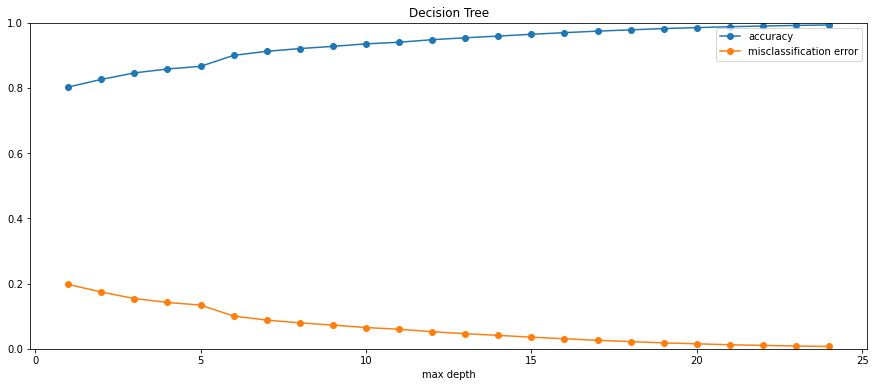

In [215]:
# Creating a decision tree model
train_accuracy = []
train_scores = []

for depth in range(1, 25):
    
    dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth,random_state=1)
    
    dtree = dtree.fit(X_train_scaled, y_train)
    
    y_predict = dtree.predict(X_train_scaled)      

    train_accuracy.append(accuracy_score(y_train, y_predict))
    train_scores.append(1 - dtree.score(X_train_scaled, y_train))
      

plt.plot(range(1, 25), train_accuracy, '-o', label = "accuracy")
plt.plot(range(1, 25), train_scores, '-o', label = "misclassification error")
plt.legend(loc = 'best')
plt.xlabel('max depth')
#plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.title(f"Decision Tree")
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.show()


In [216]:
train_accuracy

[0.8024878415749266,
 0.8260206189936321,
 0.8458555398976467,
 0.8579556892952881,
 0.8659447546594051,
 0.8996810731200797,
 0.9120249207980589,
 0.9204590004132275,
 0.9272825522626855,
 0.9348901768401869,
 0.9399230761080325,
 0.9477002299240297,
 0.9535913709617606,
 0.958836181777726,
 0.9642823085644052,
 0.9692304432130029,
 0.9739560707360747,
 0.9779188166859153,
 0.9818179891713199,
 0.9847211773805613,
 0.9875501965479608,
 0.989626929719535,
 0.9914599646107715,
 0.9929009631379863]

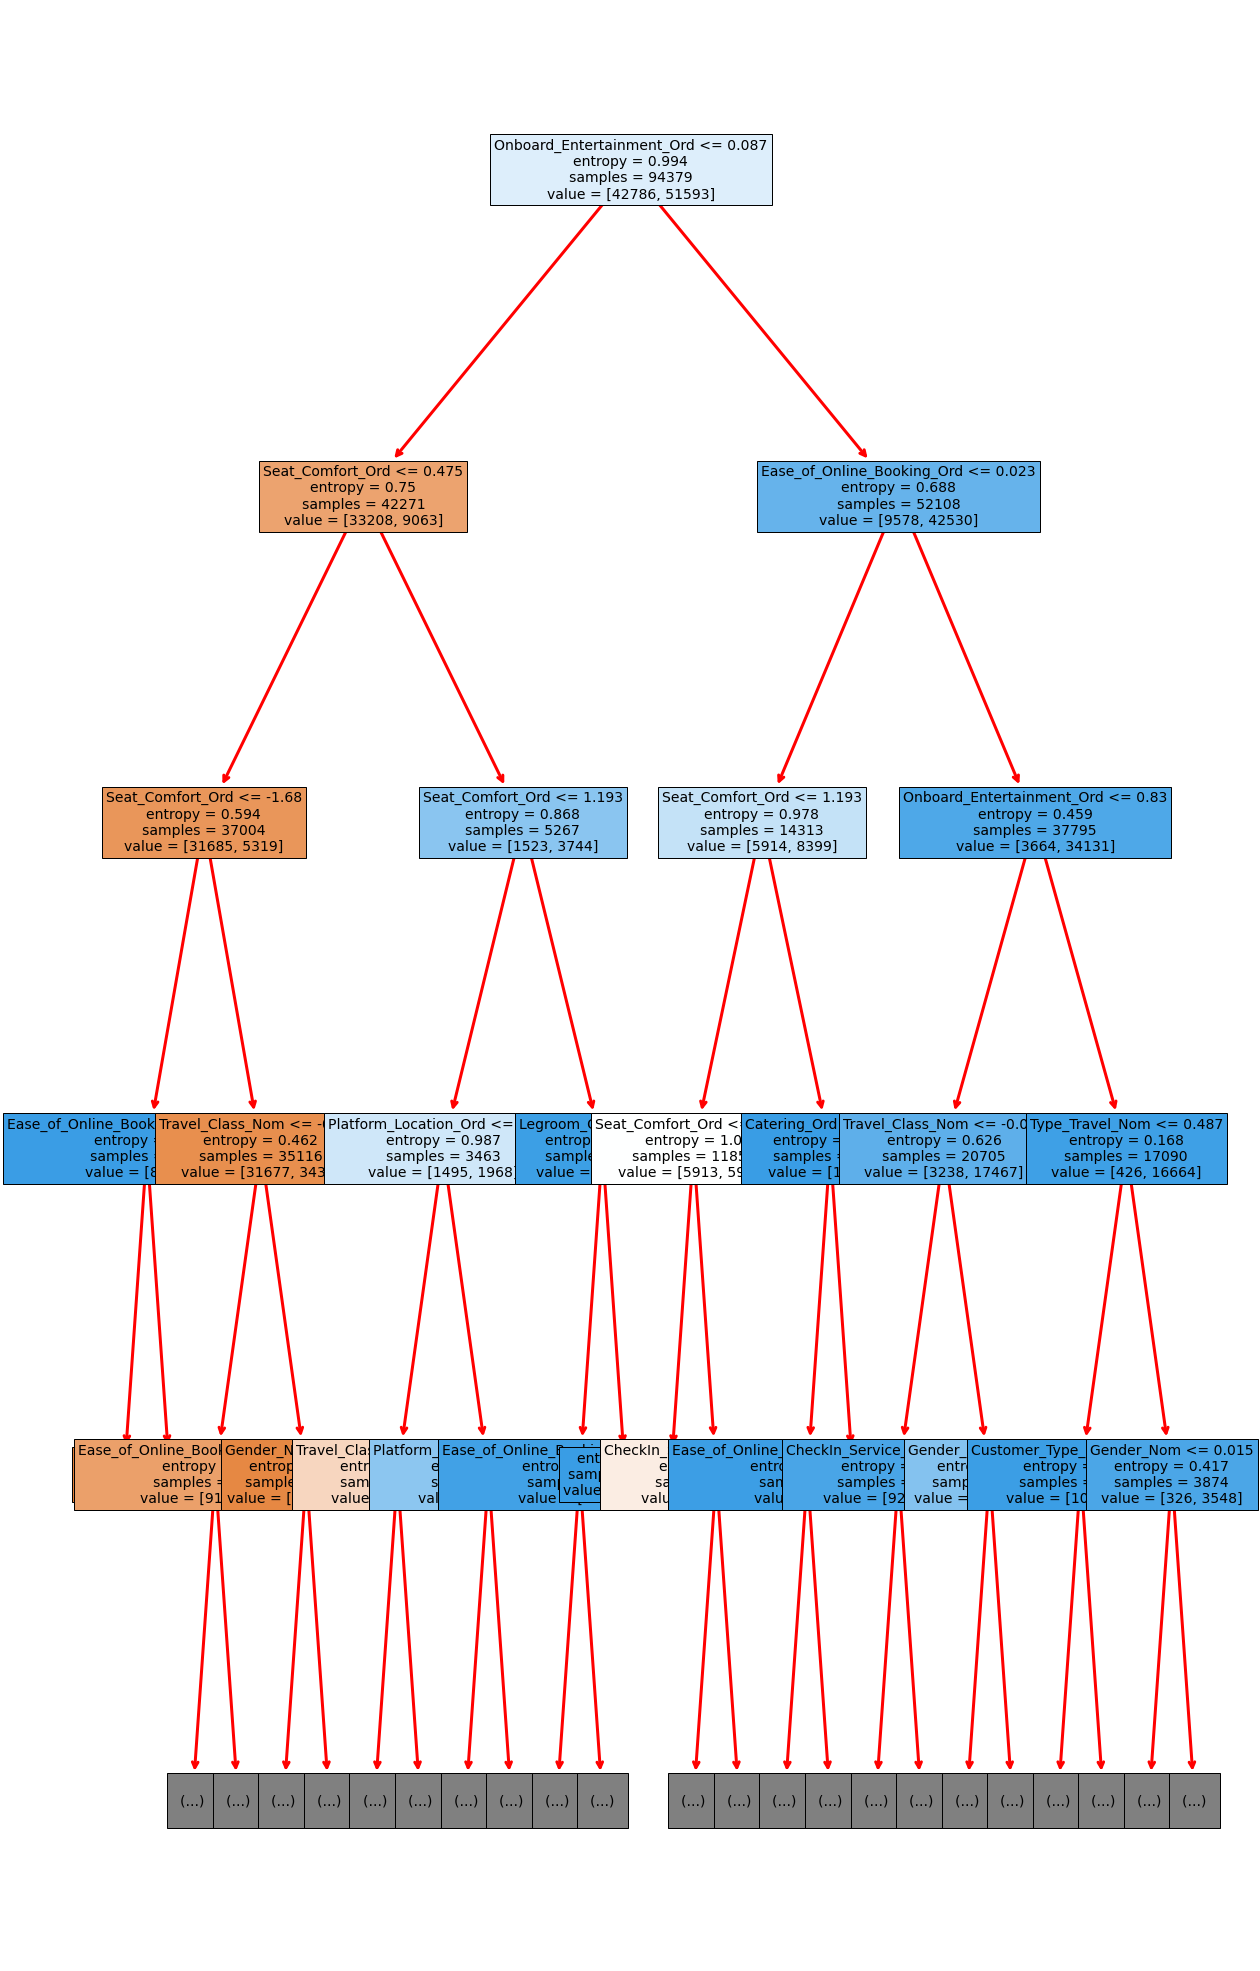

In [217]:
fig, ax = plt.subplots(figsize = (20, 36))

out = tree.plot_tree(dtree, fontsize = 14, max_depth = 4, filled = True, feature_names = X_train_scaled.columns)

for o in out:
    
    arrow = o.arrow_patch
    
    if arrow is not None:
        
        arrow.set_edgecolor('red')
        
        arrow.set_linewidth(3)
  
plt.show()

In [218]:
fimport = pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns).sort_values(by = 'Imp', ascending = False)
fimport.head(25)

,Imp
Onboard_Entertainment_Ord,0.311706
Seat_Comfort_Ord,0.195793
Ease_of_Online_Booking_Ord,0.076218
Travel_Distance,0.048222
Customer_Type_Nom,0.038279
Type_Travel_Nom,0.037204
Platform_Location_Ord,0.035565
Travel_Class_Nom,0.033665
CheckIn_Service_Ord,0.033236
Arrival_Time_Convenient_Ord,0.025204


# Random Forest

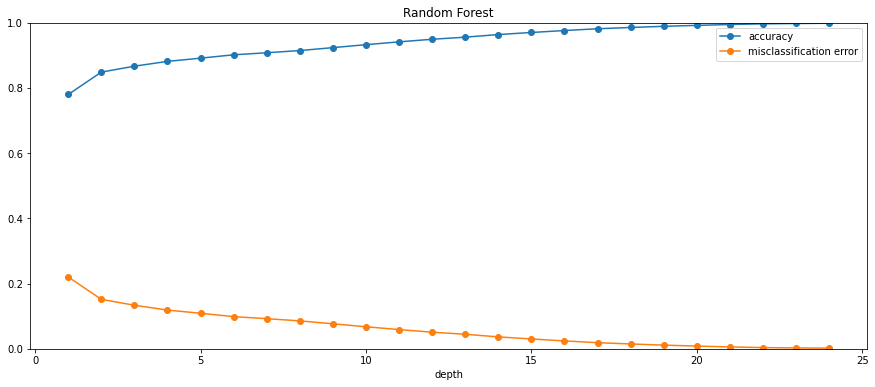

In [219]:
# Creating a random forest model
train_accuracy = []
train_scores = []

for depth in range(1,25):
    
    rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth,n_jobs = -1)
  
    rf = rf.fit(X_train_scaled, y_train)
    
    y_predict = rf.predict(X_train_scaled)      

    train_accuracy.append(accuracy_score(y_train, y_predict))
    train_scores.append(1 - rf.score(X_train_scaled, y_train))
      

plt.plot(range(1,25), train_accuracy, '-o', label = "accuracy")
plt.plot(range(1,25), train_scores, '-o', label = "misclassification error")
plt.legend(loc = 'best')
plt.xlabel('depth')
#plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.title(f"Random Forest")
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.show()

In [106]:
train_accuracy

[0.8032613187255639,
 0.8418716027929942,
 0.8625011920024582,
 0.8783521758018203,
 0.8963010839275687,
 0.9005181237351529,
 0.9077231163712266,
 0.9134977060574916,
 0.9224085866559298,
 0.9294122633212897,
 0.9389906652963054,
 0.9476366564595937,
 0.9559329935684845,
 0.9631909640915882,
 0.9692410387904089,
 0.9765096048909185,
 0.9813411881880503,
 0.9861515803303701,
 0.9900719439705867,
 0.9924135665773106,
 0.9951154388158383,
 0.9966729886945189,
 0.9975736127740281,
 0.9983470899246655]

In [220]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 24,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [221]:
fimport = pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns).sort_values(by = 'Imp', ascending = False)

fimport.head(25)

,Imp
Onboard_Entertainment_Ord,0.193005
Seat_Comfort_Ord,0.155044
Ease_of_Online_Booking_Ord,0.076122
Online_Support_Ord,0.063303
Travel_Distance,0.053007
Legroom_Ord,0.046005
Travel_Class_Nom,0.041188
Customer_Type_Nom,0.040337
Catering_Ord,0.038620
Online_Boarding_Ord,0.037877


In [222]:
rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = 24,n_jobs = -1)

rf = rf.fit(X_train_scaled, y_train)
    
y_predict_test = rf.predict(X_test_scaled) 


In [223]:
y_test = df_test.copy()

y_test['Overall_Experience'] = y_predict_test

result = y_test[['ID', 'Overall_Experience']]

result.to_csv('CarlosMedina_RandomForestV2.csv')

0.9492725 

0.9520533 **

In [231]:
rf_tuned = RandomForestClassifier(n_jobs = -1, random_state=100)

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those
parameters = {
    'max_depth': np.arange(20, 30),  
    'n_estimators':[100,150,200,250]
    }

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_tuned, param_grid=parameters)
grid_obj = grid_obj.fit(X_train_scaled,y_train)

# Set the model to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=23, n_estimators=250, n_jobs=-1,
                       random_state=100)

In [232]:
rf_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 23,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [233]:
y_predict_test = rf_tuned.predict(X_test_scaled) 


In [234]:
y_test = df_test.copy()

y_test['Overall_Experience'] = y_predict_test

result = y_test[['ID', 'Overall_Experience']]

result.to_csv('CarlosMedina_RandomForestV3.csv')

0.9516881